In [45]:
#importing files
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from fbprophet import Prophet

In [46]:
#reading dataset
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/USA_CO2.csv")


In [47]:
#vieweing the top 5 rows within the dataframe
dataset.head(5)


,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,USA,United States,1800,0.253,NaN,NaN,NaN,NaN,0.042,NaN,...,NaN,NaN,NaN,NaN,NaN,6000000,NaN,NaN,NaN,NaN
1,USA,United States,1801,0.267,NaN,5.80,0.015,NaN,0.044,NaN,...,NaN,NaN,NaN,NaN,NaN,6113782,NaN,NaN,NaN,NaN
2,USA,United States,1802,0.289,NaN,8.22,0.022,NaN,0.046,NaN,...,NaN,NaN,NaN,NaN,NaN,6229723,NaN,NaN,NaN,NaN
3,USA,United States,1803,0.297,NaN,2.53,0.007,NaN,0.047,NaN,...,NaN,NaN,NaN,NaN,NaN,6347862,NaN,NaN,NaN,NaN
4,USA,United States,1804,0.333,NaN,12.35,0.037,NaN,0.052,NaN,...,NaN,NaN,NaN,NaN,NaN,6468241,NaN,NaN,NaN,NaN


In [48]:
#dataset.info()
#dropping all columns except year and co2
dataset.drop(dataset.columns.difference(['year','co2']), 1, inplace=True)
dataset=dataset.rename(columns={'year':'yr', 'co2':'y'})
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,yr,y
0,1800,0.253
1,1801,0.267
2,1802,0.289
3,1803,0.297
4,1804,0.333


In [49]:
year_max = dataset['yr'].max()
year_min = dataset['yr'].min()

length = year_max - year_min +1

#creating a list of years to store all year values
yr_val = dataset['yr']

dataset['ds'] = [str(yr)+'/1/1' for yr in yr_val]


dataset['ds'] = pd.to_datetime(dataset['ds'])
dataset.head(5)

,yr,y,ds
0,1800,0.253,1800-01-01
1,1801,0.267,1801-01-01
2,1802,0.289,1802-01-01
3,1803,0.297,1803-01-01
4,1804,0.333,1804-01-01


In [50]:
train = dataset.iloc[:205,:]
test = dataset.iloc[205:,:]

In [51]:
#Forecasting using fbprophet

pred = Prophet()
pred.fit(train)
#predict the next n number of years, substitute n in periods, frequency is yearly
future = pred.make_future_dataframe(periods=25, freq = 'Y')
forecast = pred.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1800-01-01,-87.297435,-333.357807,150.590764
1,1801-01-01,-66.276270,-297.831812,155.529515
2,1802-01-01,-44.617358,-288.315518,186.991955
3,1803-01-01,-22.344688,-257.817796,209.716011
4,1804-01-01,0.516717,-247.574092,241.062309
...,...,...,...,...
225,2024-12-31,7619.342582,7361.183558,7870.315891
226,2025-12-31,7710.737726,7465.758607,7961.527891
227,2026-12-31,7802.520858,7553.589275,8055.642705
228,2027-12-31,7894.660146,7637.657515,8150.983391


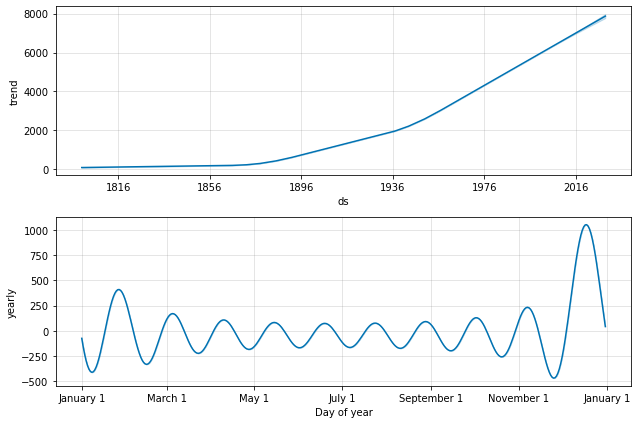

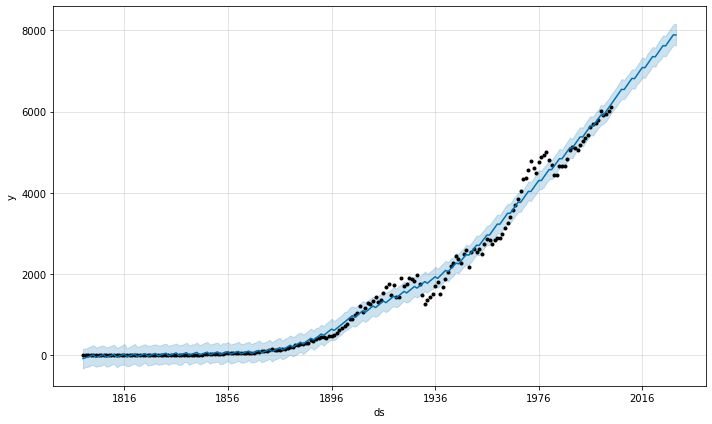

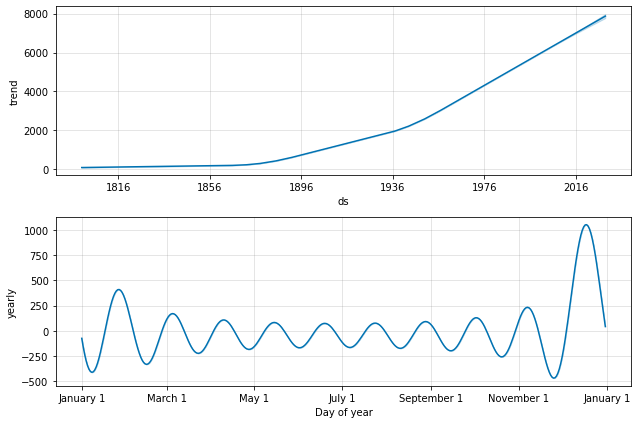

In [53]:
#plotting the forecast and the forecast components
pred.plot(forecast)
pred.plot_components(forecast)

In [54]:
#saving the data
forecast.to_csv("/content/drive/MyDrive/Colab Notebooks/Prophet for CO2.csv")

In [55]:
forecast_sub  = forecast[['ds','yhat']]
forecast_sub['ds'] = pd.to_datetime(forecast_sub['ds'])
test = test[['ds','y']]
test['ds'] = pd.to_datetime(test['ds'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [56]:
test['year'] = test['ds'].dt.to_period('Y')
forecast_sub['year'] = forecast_sub['ds'].dt.to_period('Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
eval = test.merge(forecast_sub, on=['year'], how='left')
eval['abs_err'] = abs(eval['yhat'] - eval['y'])
total_y = sum(eval['y'])
total_error = sum(eval['abs_err'])
accuracy = 1 - (total_error/total_y)
print(accuracy)

0.7546698091789655
